In [3]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import graphviz
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
## dataset
wine = load_wine()
print(wine.feature_names)
# print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [6]:
## dataset
wine = load_wine()
# print(wine.feature_names)
# print(wine.target_names)

feature_names = ['酒精',
                 '苹果酸',
                 '灰',
                 '灰的碱度',
                 '镁',
                 '总酚',
                 '类黄酮',
                 '非黄烷类酚类',
                 '花青素',
                 '颜色强度',
                 '色调',
                 'od280/od315稀释葡萄酒',
                 '脯氨酸']

## show in pandas
df = pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)
print(df.head())

## 划分数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)
# print(Xtrain.shape)
# print(Xtest.shape)
# print(Ytrain.shape)
# print(Ytest.shape)

      0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  0   
0  1065.0   0  
1  1050.0   0  
2  1185.0   0  
3  1480.0   0  
4   735.0   0  


In [121]:

## 开始
clf0 = tree.DecisionTreeClassifier(criterion='entropy'
                                   , random_state=None
                                   , splitter='random'
                                   , max_depth=3
#                                    , min_samples_leaf=10
#                                    , min_samples_split=10
                                  )  # random_state使得构建树时 不是所有的features都被使用，值任意
## 训练
clf = clf0.fit(Xtrain, Ytrain)

## train data
score_train = clf.score(Xtrain, Ytrain)
print("train score: "+str(score_train))

## test
score_test = clf.score(Xtest, Ytest)  # 返回预测的准确度
print("test score: "+ str(score_test))



train score: 0.9354838709677419
test score: 0.9259259259259259


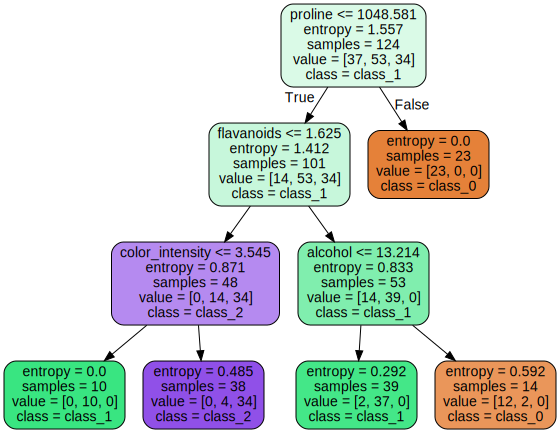

In [122]:
## 可视化。需要先安装 Graphviz.msi，并配置电脑Path
dot_data = tree.export_graphviz(clf
                                , out_file=None
                                , feature_names=wine.feature_names
                                , class_names=wine.target_names
                                , filled=True
                                , rounded=True
                                )

graph = graphviz.Source(dot_data)
graph



In [123]:
## 特征 的更多了解，哪些更重要呢？
df = pd.concat([pd.DataFrame(clf.feature_importances_),
                pd.DataFrame(wine.feature_names)],
               axis=1)
print(df)

# print([*zip(wine.feature_names, clf.feature_importances_)])


           0                             0
0   0.158044                       alcohol
1   0.000000                    malic_acid
2   0.000000                           ash
3   0.000000             alcalinity_of_ash
4   0.000000                     magnesium
5   0.000000                 total_phenols
6   0.365871                    flavanoids
7   0.000000          nonflavanoid_phenols
8   0.000000               proanthocyanins
9   0.150763               color_intensity
10  0.000000                           hue
11  0.000000  od280/od315_of_diluted_wines
12  0.325323                       proline


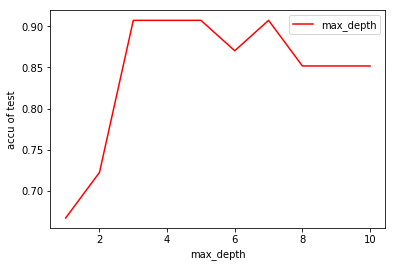

In [126]:
## 超参数的学习曲线
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     , criterion='entropy'
                                     , random_state=30
                                     , splitter='random'
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)

plt.plot(range(1,11), test, color='red', label='max_depth')
plt.xlabel('max_depth')
plt.ylabel('accu of test')
plt.legend()
plt.show() 

In [127]:
clf.apply(Xtest) # 测试样本所在的叶子节点的索引

array([15,  4, 15, 28, 15, 15,  4, 26, 28,  4, 28, 15, 22,  4, 28, 24, 28,
        4, 26, 22, 28, 14, 28, 15, 24, 24,  6, 19, 28, 22, 28,  4, 19, 15,
       26,  4,  8, 19, 15,  4, 28, 28,  4, 21, 27, 15, 14, 28, 19, 28, 26,
       15, 21, 28], dtype=int64)

In [128]:
clf.predict(Xtest)  # 每个测试样本的 测试结果

array([1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [129]:
Ytest

array([1, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1,
       0, 1, 2, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
## 交叉验证
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [137]:
boston = load_boston()

In [139]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor 
                , boston.data 
                , boston.target 
                , cv=10
                , scoring='neg_mean_squared_error')

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -43.57745098, -12.2148    , -95.2186    ,
       -57.764     , -37.9534    ])

In [136]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21